# 1.PCA
### 차원의 정의

차원(Dimension)

공간 내 데이터의  위치를 나타내기 위해 필요한 축의 개수

차원과 변수

- 데이터가 n개의 설명변수를 가진다면 n차원의 좌표 상에서 표현 할 수 있다.
- 키와 몸무게, 머리 길이를 설명 변수로 갖는 데이터

### 차원의 저주(Curse of Dimensionality)

변수가 늘어나면서 차원이 커짐에 따라 발생하는 문제

- 필요한 데이터 수의 지수 함수적 증가로 인한 정보의 밀도 감소
- 공간을 설명하기 위한 데이터의 부족
- 과적합 문제 & 성능 감소

### 차원 축소(Dimensionality Redution)

- 데이터를 잘 설명할 수 있는 변수의 개수(Latent Space)는 현재 변수의 개수(Observation Space)보다 작을 수 있다.
- 데이터를 기반으로 잠재 공간을 파악하는 것
- 차원의 저주 해결
- 연산량 감소
- 시각화 용이
- 변수 선택(Feature Selection)

→ 원본 데이터의 변수 중 불필요한 변수를 제거하는 방법

→ ex) 몸무게, 키, 머리 길이 → 몸무게, 키

- 변수추출(Featur Extraction)

→ 원본 데이터의 변수들을 조합해 새로운 변수를 생성하는 방법

→ 키, 몸무게, 머리 길이 → 체구, 머리 길이

### 변수 추출 방법

1. Principal Component Analysis(PCA)
2. Linear Discriminant Analysis
3. t-distributed Stochastic Neighbor Embedding(t-SNE)

### pca

여러 변수의 정보를 담고있는 주성분(Principal Component)이라는 새로운 변수를 생성하는 차원 축소 기법

단순히 차원을 줄이기 보다는 관측된 차원이 아닌 실제 데이터를 설명하는 차원을 찾아서 데이터를 더 잘 이해하고자 함

분산을 최대로 보존하는 초평면선택

- 원본 데이터 셋과 투영된 초평면의 평균제폽거리를 최소화
- 정보를 가장 적게 손실하기 때문

주성분 축을 찾는 방법

1. 데이터 표준화 : 데이터를 표준화 하지 않으면 값의 크기에 따라 공분산이 영향을 받음
2. 공분산 행렬 생성
3. 고유값 분해
4. K개 벡터의 새로운 Basis
    1. Scree Plot(Elbow Point)
    2. Explained Variance(설명력으로 선정)

### PCA의 장점

- 변수간 상관관계 및 연관성을 이용해 변수를 생성한다.
- 차원 축소로 차원의 저주를 해결할 수 있다.

### PCA의 단점

- 데이터에 선형성이 없다면 적용할 수 없다.
- 데이터의 클래스를 고려하지 않기 때문에 최대 분산 방향이 특징 구분을 좋게 한다고 보장할 수 없다.
- 주성분의 해석을 위한 도메인 지식이 필요하다.

In [4]:
# Data set
from sklearn.datasets import load_digits
digits = load_digits()

data, target = digits["data"], digits["target"]
data[0].shape

(64,)

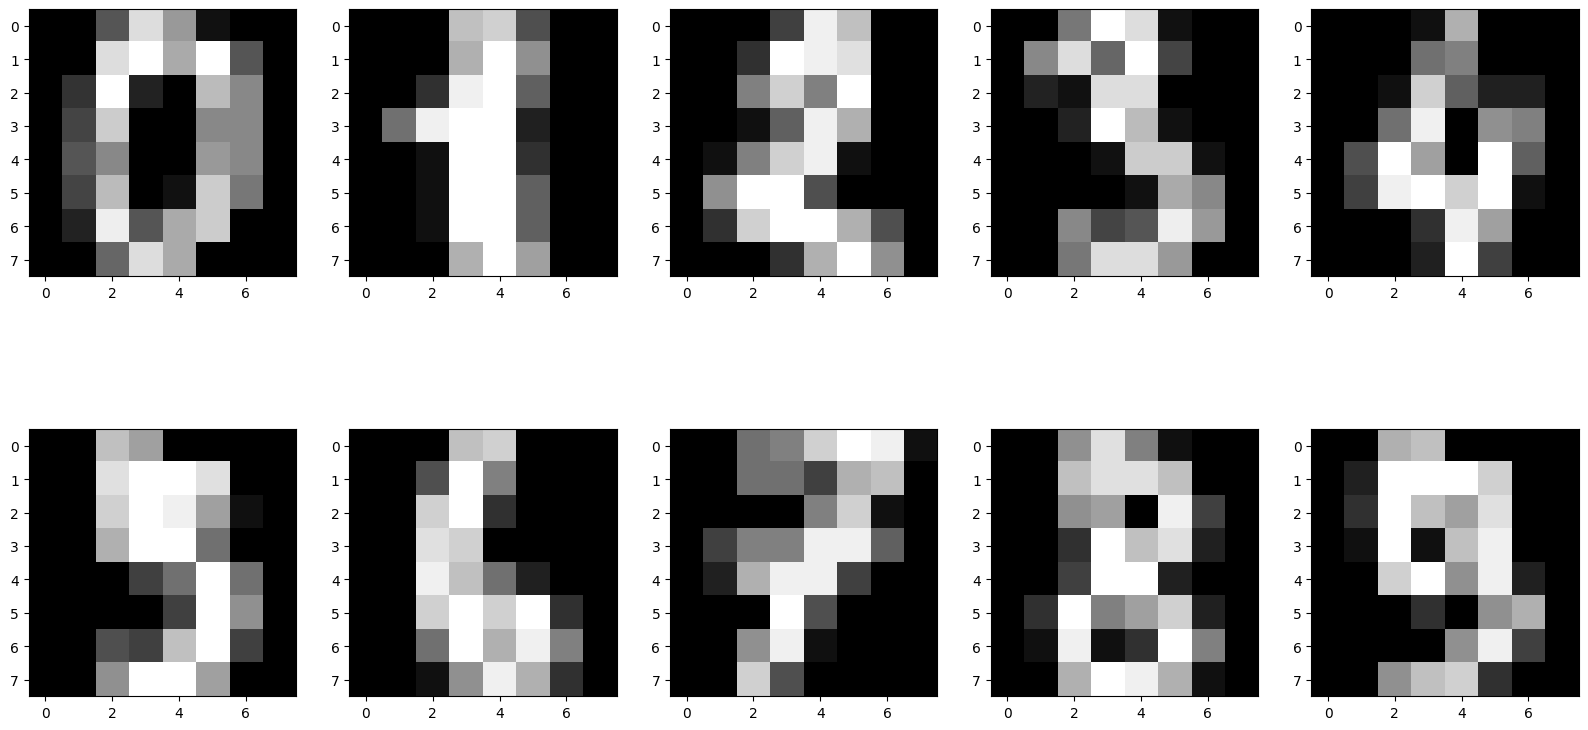

In [5]:
import matplotlib.pyplot as plt
samples = data[:10].reshape(10, 8, 8)
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (20, 10))
for idx, sample in enumerate(samples):
	axes[idx//5, idx%5].imshow(sample, cmap = "gray")

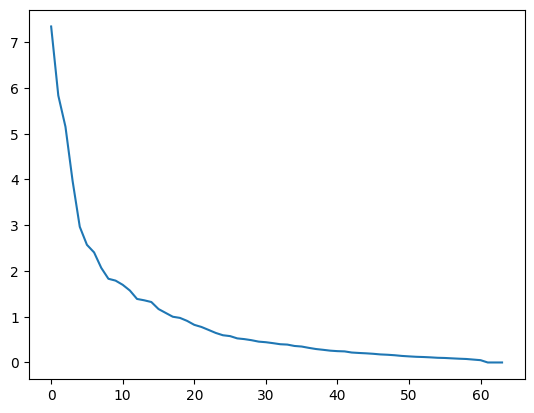

In [7]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 학습
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)

# 설명된 분산
plt.plot(pca.explained_variance_);
# 8부근에서 ebow point

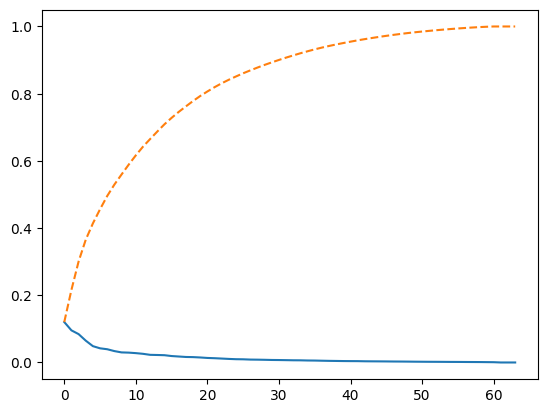

In [8]:
# cumsum(): 누적
plt.plot(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_.cumsum(), linestyle="--");

In [9]:
# 제한된 PCA
# 비율
ratio_pca = PCA(n_components=0.8)
ratio_pca.fit(scaled_data)
ratio_pca.n_components_

21

In [12]:
# 개수
n_comp_pca = PCA(n_components = 8)
n_comp_pca.fit(scaled_data)
n_comp_pca.n_components

8

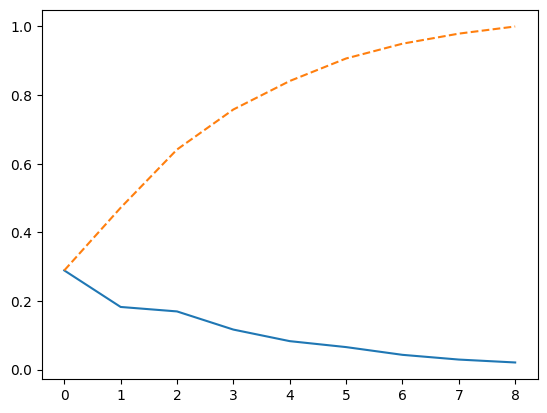

In [13]:
# LDA 학습
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(scaled_data, target)

# 분산의 크기를 나타내는 값은 없다.
# 설명된 분산의 크기만 확인

plt.plot(lda.explained_variance_ratio_)
plt.plot(lda.explained_variance_ratio_.cumsum(), linestyle="--");

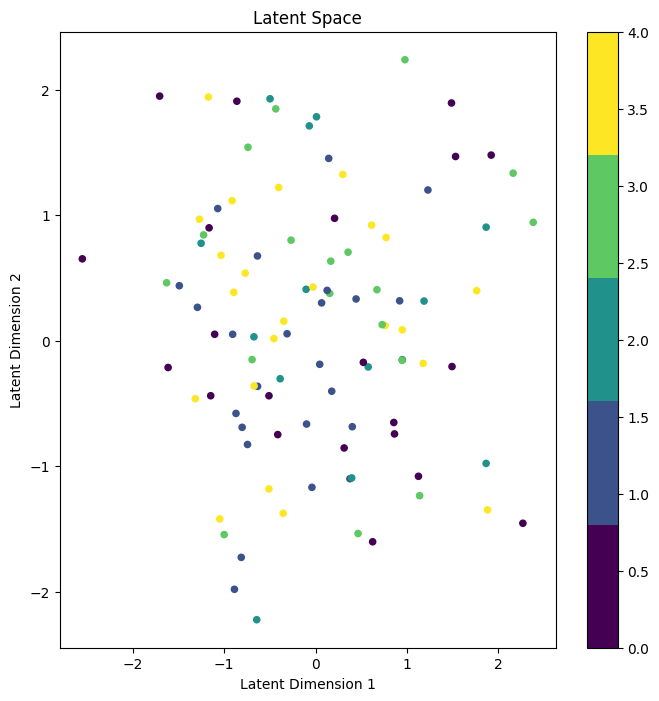

In [16]:
import matplotlib.pyplot as plt

def visualize_latent_space_with_label(latent_data, labels, title="Latent Space"):

    # 색상 맵 설정 (라벨에 따라 다른 색상 사용)
    cmap = plt.get_cmap('viridis', len(set(labels)))

    # 그림 생성
    plt.figure(figsize=(8, 8))
    plt.scatter(latent_data[:, 0], latent_data[:, 1], c=labels, cmap=cmap, marker='o', s=20)
    plt.colorbar()
    plt.title(title)
    plt.xlabel("Latent Dimension 1")
    plt.ylabel("Latent Dimension 2")

    # 시각화 보기
    plt.show()

# 예시 데이터
import numpy as np
np.random.seed(0)
latent_data = np.random.randn(100, 2)  # 임의의 잠재 공간 데이터 생성 (2차원)
labels = np.random.randint(0, 5, size=100)  # 임의의 라벨 생성 (0에서 4까지)

# 시각화 함수 호출
visualize_latent_space_with_label(latent_data, labels, title="Latent Space")

In [18]:
# T-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_latent = tsne.fit_transform(data)
tsne_latent

array([[ -1.9045748,  55.536804 ],
       [ 10.40585  , -11.469964 ],
       [-13.420831 , -18.708923 ],
       ...,
       [ -5.782568 , -10.7062645],
       [-21.048574 ,  15.22047  ],
       [-13.969724 ,  -7.027256 ]], dtype=float32)

In [27]:
import warnings
warnings.filterwarnings("ignore")

<Figure size 700x700 with 0 Axes>

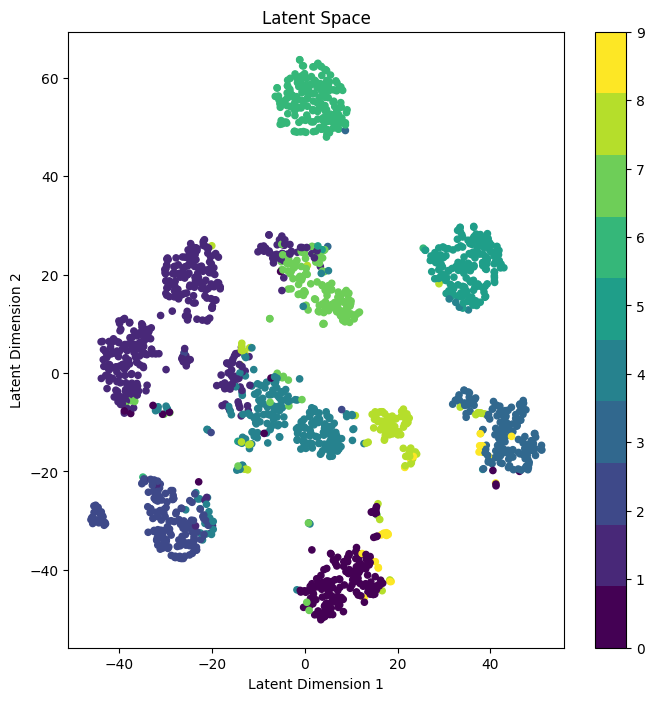

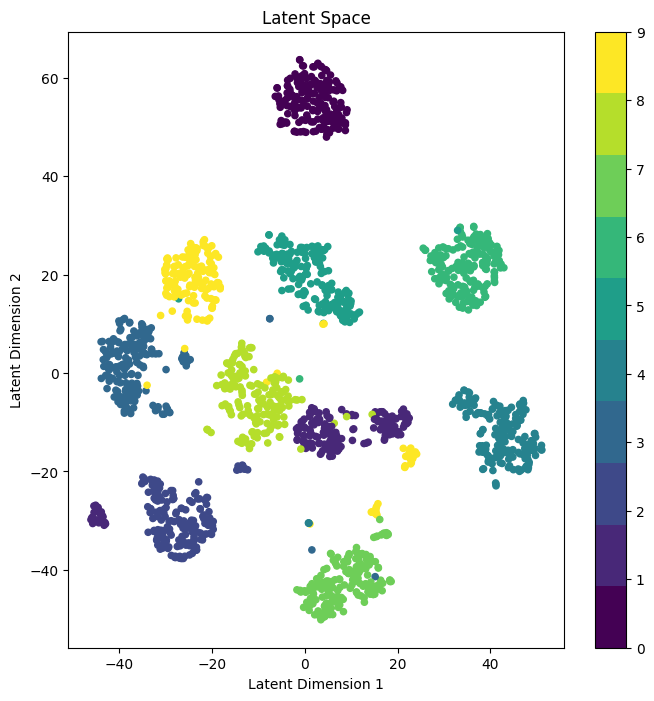

In [29]:
# 군집화
from sklearn.cluster import KMeans

# Kmeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(scaled_data)

# 예측
pred = kmeans.predict(scaled_data)
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, pred);
visualize_latent_space_with_label(tsne_latent, target);

<Figure size 700x700 with 0 Axes>

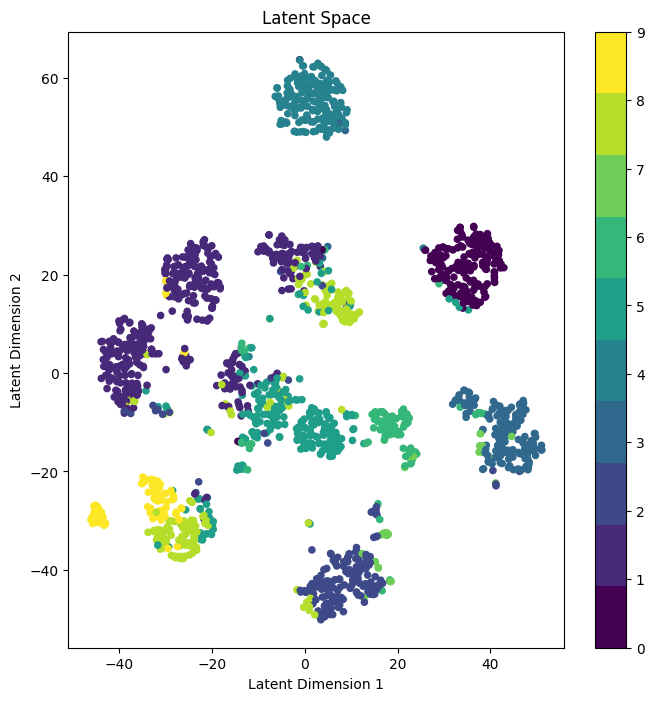

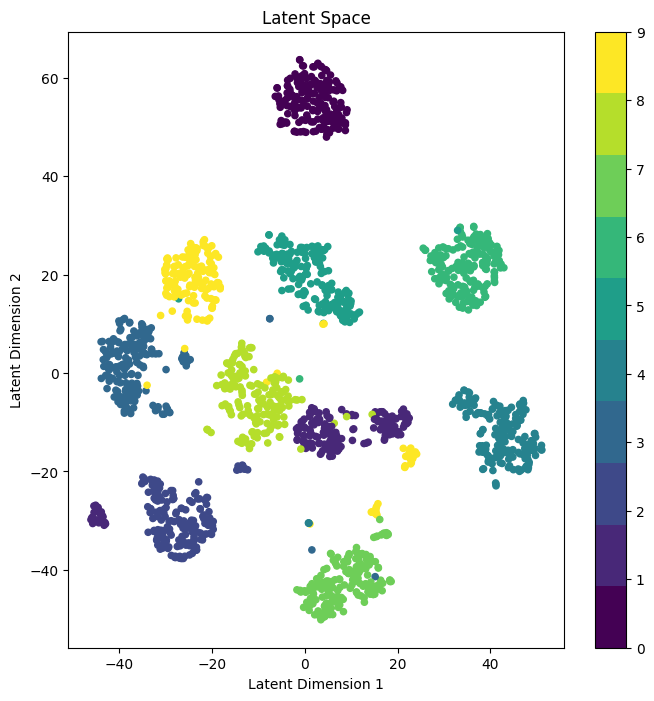

In [33]:
# PCA clustering
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# kmeans 학습
pca_kmeans = KMeans(n_clusters=10)
pca_kmeans.fit(pca_data)

# 예측
pca_pred = pca_kmeans.predict(pca_data)

# 시각화
plt.figure(figsize=(7, 7))
visualize_latent_space_with_label(tsne_latent, pca_pred);
visualize_latent_space_with_label(tsne_latent, target);

Raw TSNE


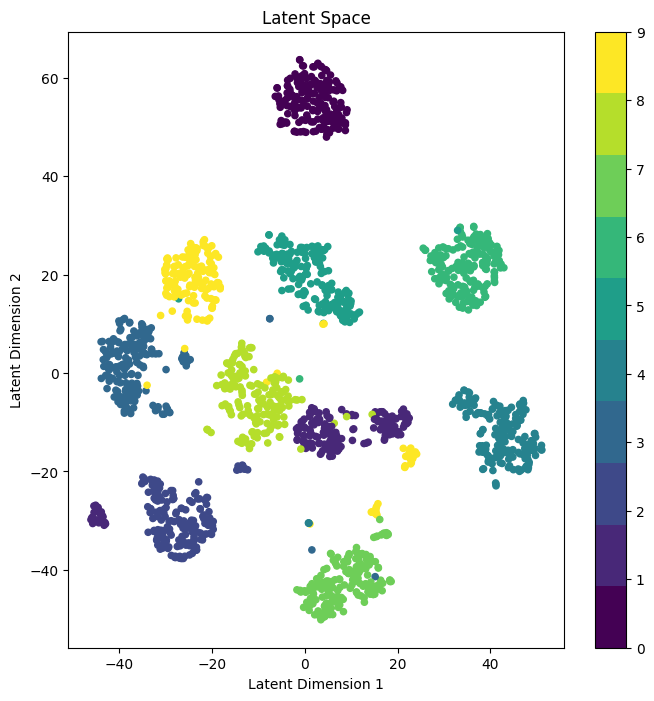

Raw Clustering


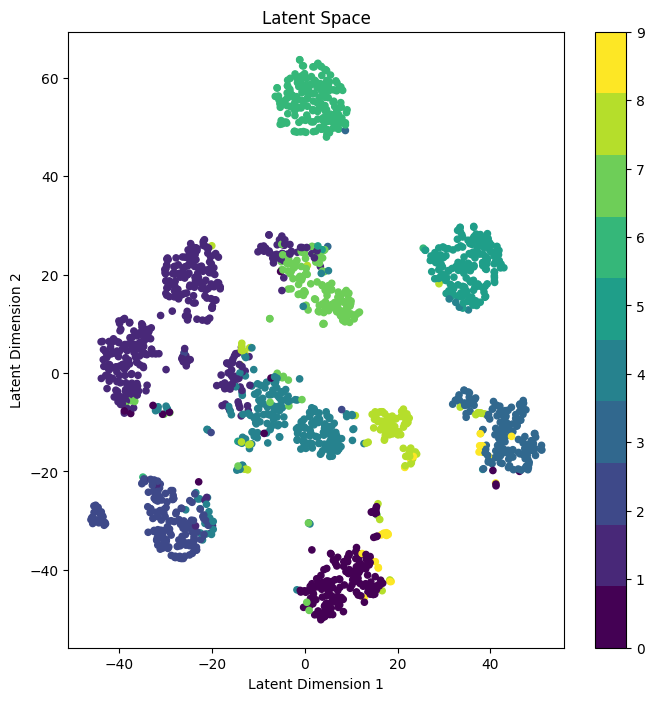

PCA Clustering


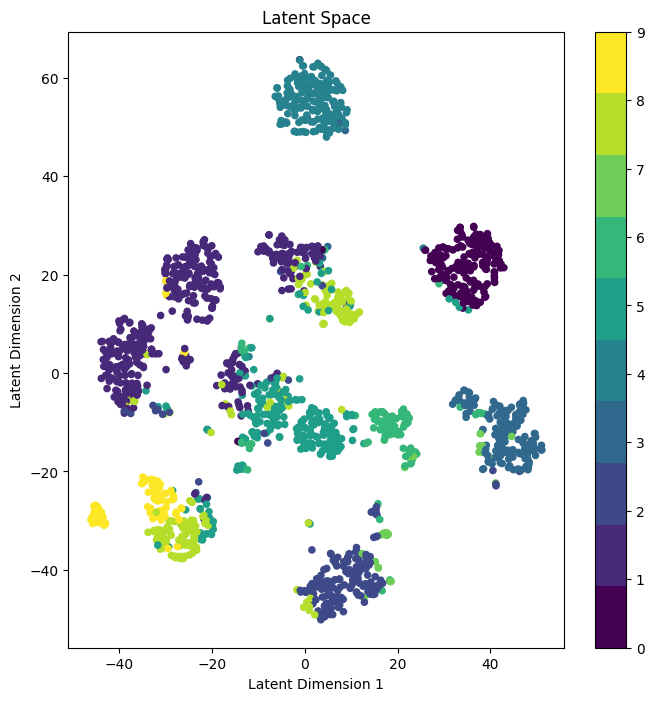

In [38]:
# 전체
print("Raw TSNE")
visualize_latent_space_with_label(tsne_latent, target)
print("Raw Clustering")
visualize_latent_space_with_label(tsne_latent, pred)
print("PCA Clustering")
visualize_latent_space_with_label(tsne_latent, pca_pred)
# PCA후 시각화와 다른 군집화와 크게 차이가 없어 보인다. 이때 사용된 차원은 12개 이다.
# 반면 다른 군집화는 차원이 64개이다. 이로서 12개로도 충분히 군집화를 할 수 있다.

Eigenface를 이용한 차원 축소와 SVM을 이용한 분류

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)
data, target = faces["data"], faces["target"]

# EDA
n_samples, h, w = faces.images.shape
n_samples, h , w

(1288, 50, 37)

In [41]:
# name
target_names = faces.target_names
n_classes = target_names.shape[0]
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

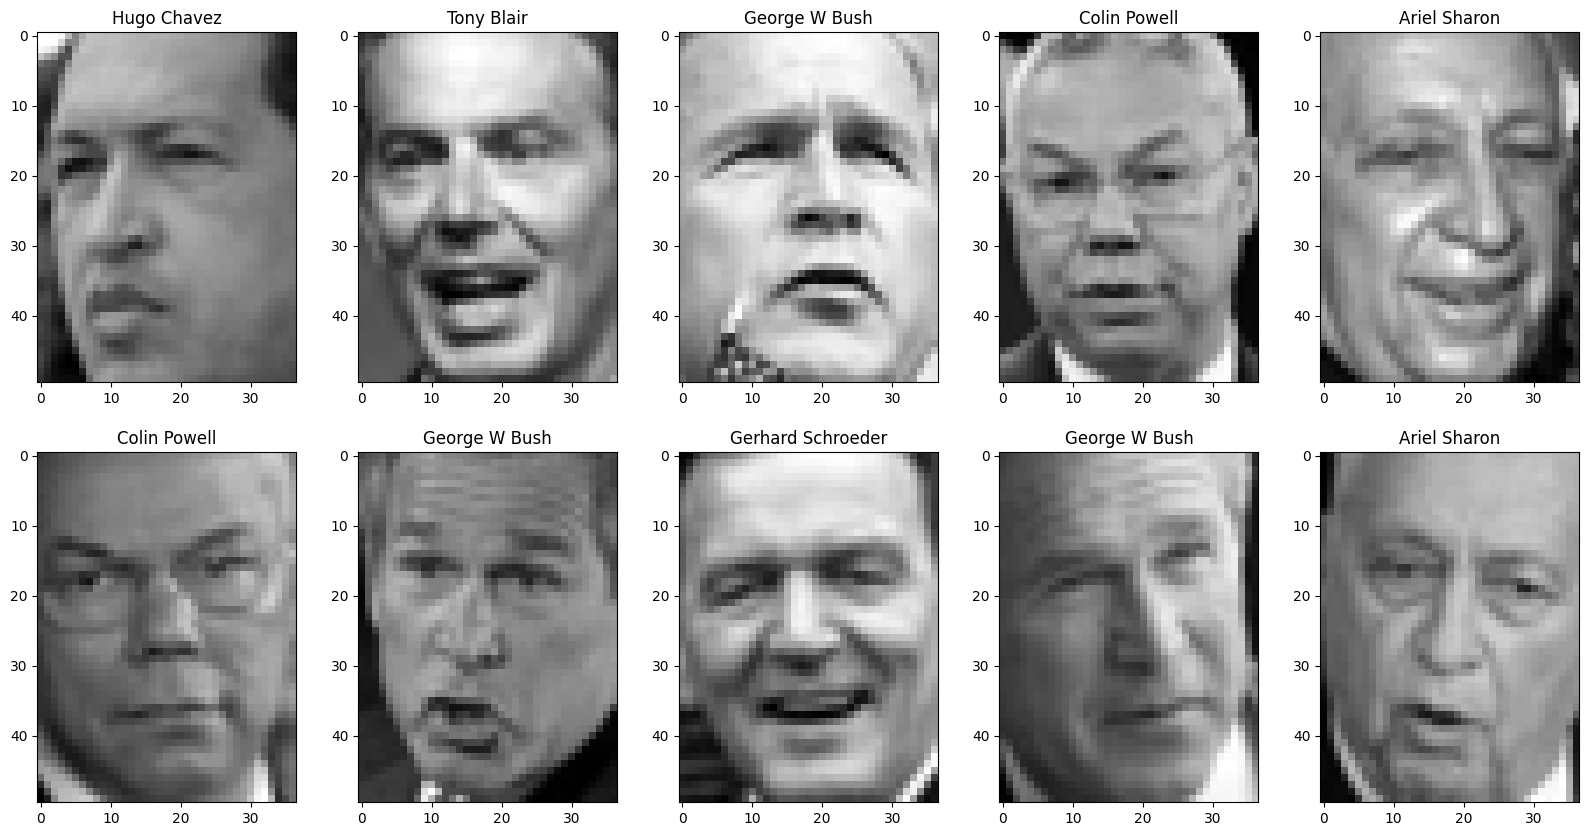

In [42]:
# img
samples = data[:10].reshape(10, h, w)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    ax = axes[idx//5, idx%5]
    ax.imshow(sample, cmap="gray")
    ax.set_title(target_names[target[idx]])

In [46]:
# Data Split
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
	data, target,train_size = 0.7, random_state = 2021)
print(f"train_data size: {len(train_target)}, {len(train_target)/len(data):.2f}")
print(f"test_data size: {len(test_target)}, {len(test_target)/len(data):.2f}")

train_data size: 901, 0.70
test_data size: 387, 0.30


In [47]:
# Data Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [48]:
# Data Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

## 1.1 Eigneface

Eigenface란 PCA를 이용해 얼굴 사진을 축소하면 생기는 eigenvector가 얼굴 모양과 같다고 하여서 생긴 용어

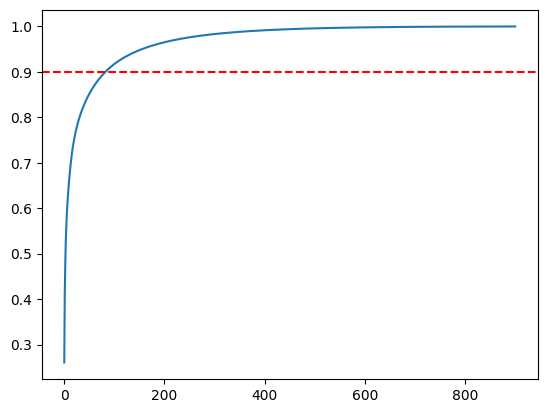

In [49]:
# pca
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_train_data)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.axhline(0.9, color="red", linestyle="--")

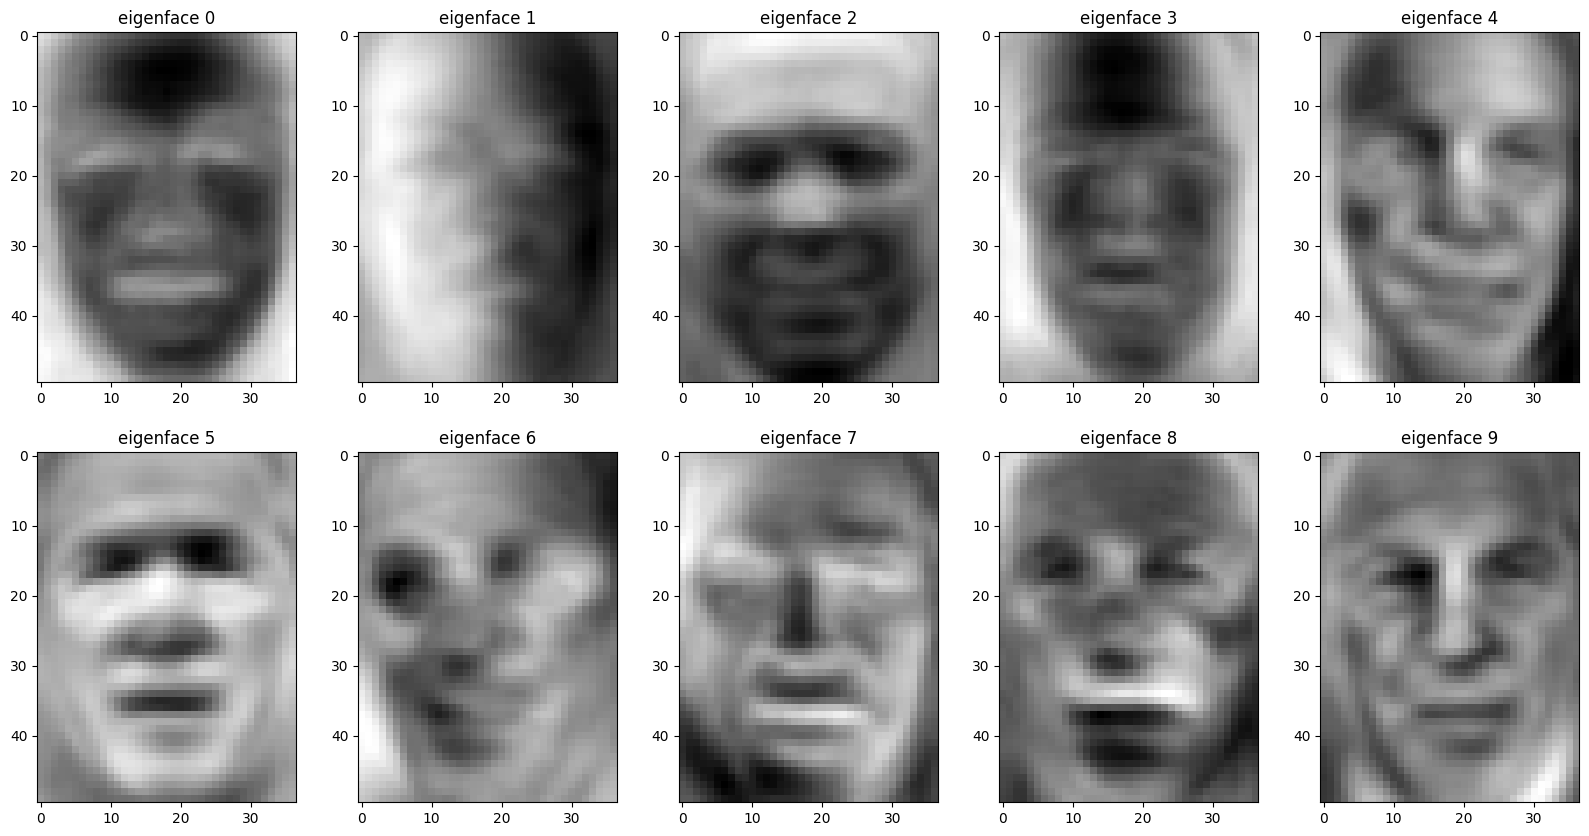

In [50]:
pca = PCA(n_components=0.9)
pca.fit(scaled_train_data)

pca_train_data = pca.transform(scaled_train_data)
pca_test_data = pca.transform(scaled_test_data)

# Vizualization
eigenfaces = pca.components_.reshape((pca.n_components_, h, w))
samples = eigenfaces[:10].reshape(10, h, w)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    ax = axes[idx//5, idx%5]
    ax.imshow(sample, cmap="gray")
    ax.set_title(f"eigenface {idx}")

In [51]:
# SVM
from sklearn.svm import SVC

svm = SVC()
svm.fit(scaled_train_data, train_target)

train_pred = svm.predict(scaled_train_data)
test_pred = svm.predict(scaled_test_data)

from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_target, train_pred)
test_acc = accuracy_score(test_target, test_pred)

print(f"train accuracy is {train_acc:.4f}")
print(f"test accuracy is {test_acc:.4f}")

train accuracy is 0.9501
test accuracy is 0.7183


In [53]:
# Eigenface
eigenface_svm = SVC()
eigenface_svm.fit(pca_train_data, train_target)

pca_train_pred = eigenface_svm.predict(pca_train_data)
pca_test_pred = eigenface_svm.predict(pca_test_data)

pca_train_acc = accuracy_score(train_target, pca_train_pred)
pca_test_acc = accuracy_score(test_target, pca_test_pred)

print(f"Eigenface train accuracy is {pca_train_acc:.4f}")
print(f"Eigenface test accuracy is {pca_test_acc:.4f}")

Eigenface train accuracy is 0.9279
Eigenface test accuracy is 0.7390


In [54]:
# result
train_data.shape

(901, 1850)

In [55]:
pca_train_data.shape

(901, 83)

In [56]:
print(f"Baseline test accuracy is {test_acc:.4f}")
print(f"Eigenface test accuracy is {pca_test_acc:.4f}")
# pca 전후 차이는 거의 없다 차원을 축소해서 충분히 모델이 만들어 지는 것을 알 수 있다.

Baseline test accuracy is 0.7183
Eigenface test accuracy is 0.7390


# 2.Clustering
유사한 속성을 갖는 데이터들을 묶어 전체 데이터를 몇 개의 군집으로 나누는 것

- Unsupervised Lerning
- 소속 집단의 정보를 모르고 있는 상태
- Label이 없는 데이터를 나누는 방법

군집분석의 종류

1. 계층적 군집화
    - 개체들을 가까운 집단부터 묶어 나가는 방식
    - 유사한 개체들이 결합되는 dendrogram 생성
    - Cluster들은 sub-cluster를 갖고 있다.
    - 거리의 종류
        1. 유클리드 거리
        2. 맨해튼 거리
        3. 표준화 거리
        4. 민콥스키 거리
    - Hierachical Clustering 종류
        1. 최단 연결법(군집간의 가장 가까운 데이터의 거리가 새로운 거리가 된다)
        2. 최장 연결법(군집간의 가장 먼 데이터의 거리가 새로운 거리가 된다)
        3. 평균 연결법(군집간의 데이터들의 거리의 평균이 새로운 거리가 된다)
        4. 중심 연결법(군집의 중심이 새로운 거리가 된다)

좋은 Clusering이란?

- 군집 내 유사도를 최대화(거리를 최소화)
- 군집 간 유사도를 최소화(거리를 최대화)

### 군집  평가

**Dunn Index**

DI  = 군집과 군집 사이의 거리 중 최소값/군집 내 데이터 간 거리 중 최대값

→ DI가 큰 모델

Silhouette Index

$$
S = \frac{b(i) - a(i)}{max[a(i),b(i)]}
$$

군집 내 응집도(cohesion)

a(i) : 데이터 x와 동일한 군집 내의 나머지 데이터들과의 평균 거리

군집 간 분리도(separation)

b(i) : 데이터 x와 가장 가까운 군집 내의 모든 데이터들과의 평균 거리

→ S가 큰 모델

1. 비계증적 군집화
    - 전체 데이터를 확인하고 특정한 기준으로 데이터를 동시에 구분한다.
    - 각 데이터들은 사전에 정의된 개수의 군집 중 하나에 속하게 된다.
    1. K-Means
        - 주어진 데이터를 k개의 군집으로 묶는 방법
        - 각 군집은 하나의 중심을 가짐
        - 각 데이터는 가장 가까운 중심에 할당
        - 같은 중심에 할당된 개체들이 모여 하나의 군집을 형성
        - 사전에 군집의 수, k가 정해져야 함
    
       b. K-means 방법
    
    1. 데이터 중 임의로 k개의 중심점(Centroid) 설정한다
    2. 모든 데이터에서 설정된 각 군집의 중심점까지의 거리 계산한다.
    3. 모든 데이터를 가장 가까운 중심점이 속한 군집으로 할당한다.
    4. 각 군집의 중심점을 재설정한다.
    5. 군집의 중심점이 변경되지 않을 때까지 2~5를 반복한다.
    
       c. K-means 장점
    
    - 적용하기가 쉽다
    - 새로운 데이터에 대한 군집을 계산할 때 각 군집의 중심점과의 거리만 계산하면 되기 때문에 빠르다
    
       d. K-means 단점
    
    - 서로 다른 크기의 군집을 잘 못 찾음
    - 서로 다른 밀도의 군집을 잘 못 찾음
    - 지역적 패턴이 존재하는 군집을 잘 못 찾음
    
    b. DB Scan(Density-Based Spatial Clustering of Applications with Noise)
    
    : 점 p에서 부터 거리가 e(epsilon) 내에 m(minPts)개 이상 있으면 하나의 군집으로 인식
    
    - Core Points : 거리 eps이내에 데이터가 (자신 포함) minPts개 이상 있는 포인트
    - Border Points : Core Points를 이웃으로 갖고 있지만 eps 이내에 데이터가 minPts개 보다 적은 포인트
    - Noise Points : Core Points를 이웃으로 갖고 있지 않고 eps 이내에 데이터가 minPts개 보다 적은 포인트
    - 모수
        - minPts
            - 최적의 minPts를 구하는 방법에 대해서는 알려진 방법이 없다.
            - Cross Validation등의 방법으로 구해야 한다.
        - EPS
            - 주어진 minPts에 대한 최적의 거리를 구하는 방법에 대해선 K-dist Graph를 사용한다.
            - K-Dist Graph
                - minPts번째 인접한 이웃 데이터 포인트까지의 거리
                - 급격히 증가하기 직전의 지점을 eps으로 설정한다.
    - 장점
        - 지역적 패턴이 있는 데이터의 군집도 찾을 수 있다.
        - 노이즈 데이터를 따로 분류하여 노이즈 데이터들이 군집에 영향을 주지 않는다.
    - 단점
        - 밀도가 구역에 따라 바뀔 경우를 파악하지 못한다.

## 2.1 Hierarchical Clustering

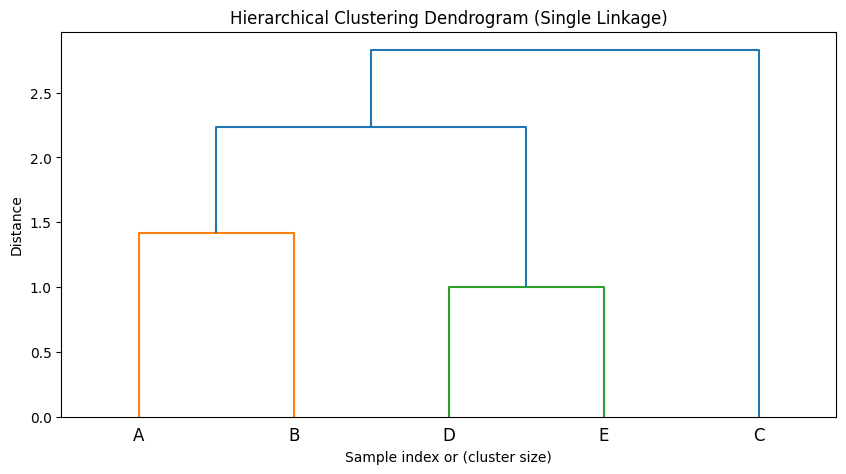

In [83]:
# Importing necessary libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Given data
data = np.array(
    [
        (1, 5),
        (2, 4),
        (4, 6),
        (4, 3),
        (5, 3),
    ]
)

# Creating an instance of AgglomerativeClustering with single linkage
single_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="single")

# Fitting the model to the data
single_cluster.fit(data)

# Function to plot dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs, labels=["A", "B", "C", "D", "E"])

# Plotting the dendrogram
plt.figure(figsize=(10, 5))
plot_dendrogram(single_cluster)
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

## 2.2 Non-Hierachical Clustering

### 2.2.1 K-Means

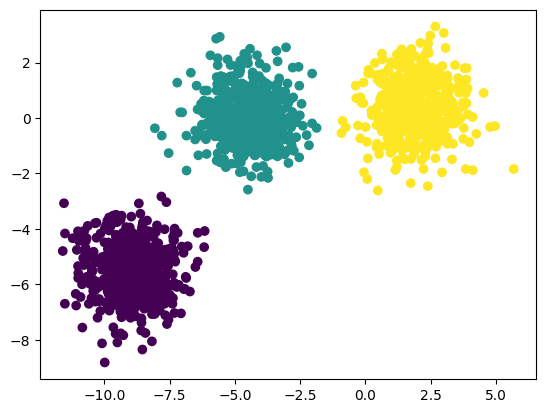

In [59]:
# K-Means
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2022)

from sklearn.datasets import make_blobs

data, label = make_blobs(n_samples=1500, random_state=170)
plt.scatter(data[:, 0], data[:, 1], c=label);

In [60]:
from sklearn.cluster import KMeans

correct_kmeans = KMeans(n_clusters=3)
correct_kmeans.fit(data)

correct_pred = correct_kmeans.predict(data)
correct_kmeans.cluster_centers_

array([[ 1.91176144,  0.40634045],
       [-8.94137566, -5.48137132],
       [-4.55490993,  0.02920864]])

In [62]:
correct_center = correct_kmeans.cluster_centers_

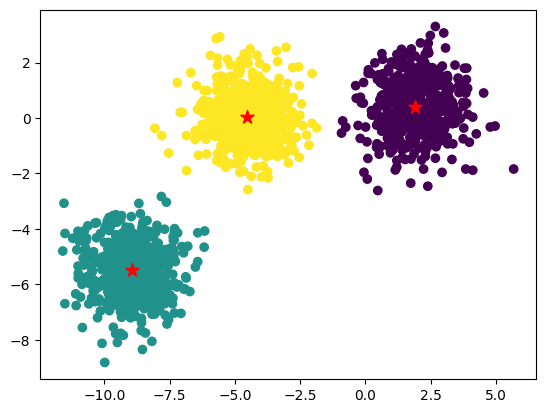

In [63]:
plt.scatter(data[:, 0], data[:, 1], c=correct_pred)
plt.scatter(correct_center[:, 0], correct_center[:, 1], marker="*", s=100, color="red");

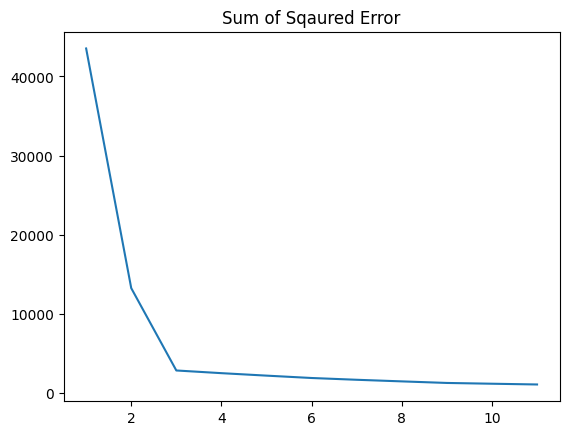

In [65]:
# 군집수 찾기
sse_per_n = []

for n in range(1, 12):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(data)
    sse = kmeans.inertia_
    sse_per_n += [sse]

plt.plot(range(1, 12), sse_per_n)
plt.title("Sum of Sqaured Error");

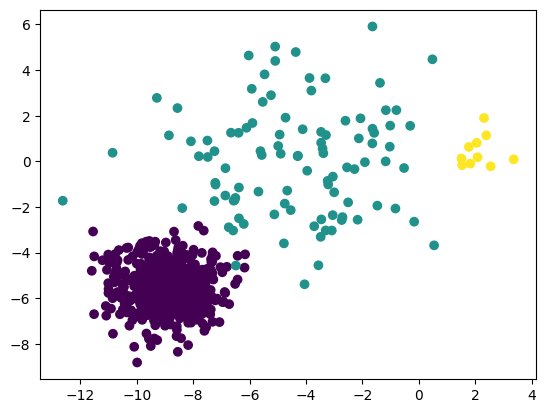

In [66]:
# K-Means 단점
# 서로 다른 크기의 군집

size_data, size_label = make_blobs(
    n_samples=1500,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=170
)
size_data = np.vstack(
    (size_data[size_label == 0][:500],
     size_data[size_label == 1][:100],
     size_data[size_label == 2][:10])
)
size_label = [0] * 500 + [1] * 100 + [2] * 10
plt.scatter(size_data[:, 0], size_data[:, 1], c=size_label);

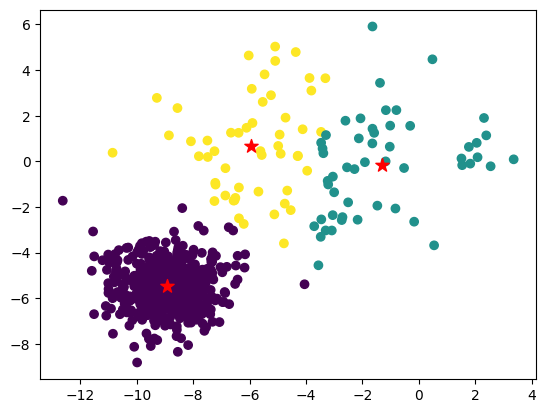

In [67]:
size_kmeans = KMeans(n_clusters=3, random_state=2021)
size_pred = size_kmeans.fit_predict(size_data)
size_center = size_kmeans.cluster_centers_
plt.scatter(size_data[:, 0], size_data[:, 1], c=size_pred)
plt.scatter(size_center[:, 0], size_center[:, 1], marker="*", s=100, color="red");

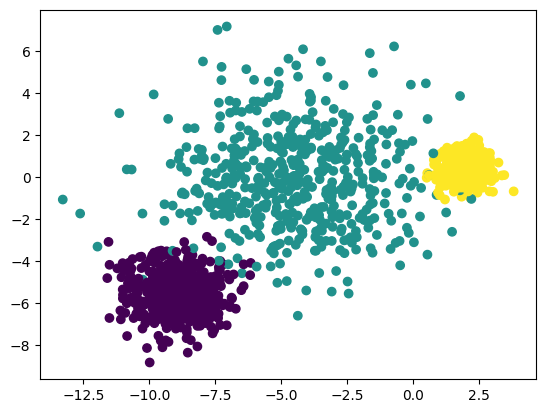

In [68]:
# 서로 다른 밀도
density_data, density_label = make_blobs(
    n_samples=1500,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=170
)
plt.scatter(density_data[:, 0], density_data[:, 1], c=density_label);

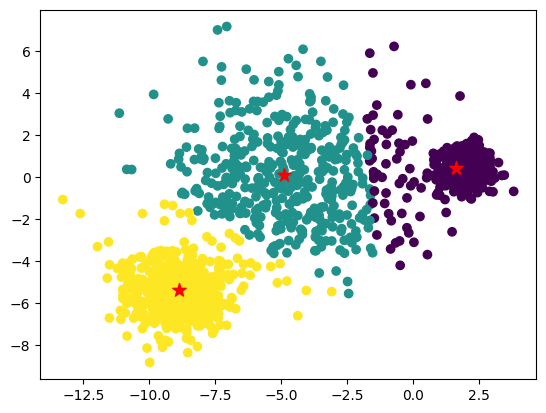

In [69]:
density_kmeans = KMeans(n_clusters=3, random_state=2021)
density_pred = density_kmeans.fit_predict(density_data)
density_center = density_kmeans.cluster_centers_
plt.scatter(density_data[:, 0], density_data[:, 1], c=density_pred)
plt.scatter(density_center[:, 0], density_center[:, 1], marker="*", s=100, color="red");

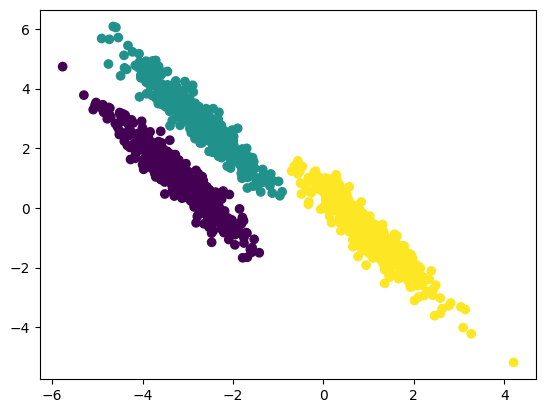

In [70]:
# 지역적 패턴이 있는 군집
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
pattern_data = np.dot(data, transformation)
plt.scatter(pattern_data[:, 0], pattern_data[:, 1], c=label);

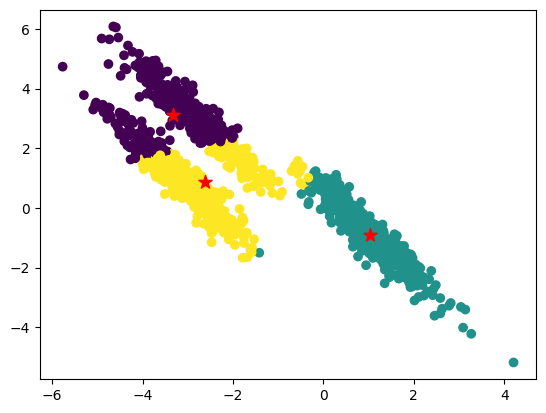

In [71]:
pattern_kmeans = KMeans(n_clusters=3, random_state=2021)
pattern_pred = pattern_kmeans.fit_predict(pattern_data)
pattern_center = pattern_kmeans.cluster_centers_
plt.scatter(pattern_data[:, 0], pattern_data[:, 1], c=pattern_pred)
plt.scatter(pattern_center[:, 0], pattern_center[:, 1], marker="*", s=100, color="red");

### 2.2.2 DBSCAN

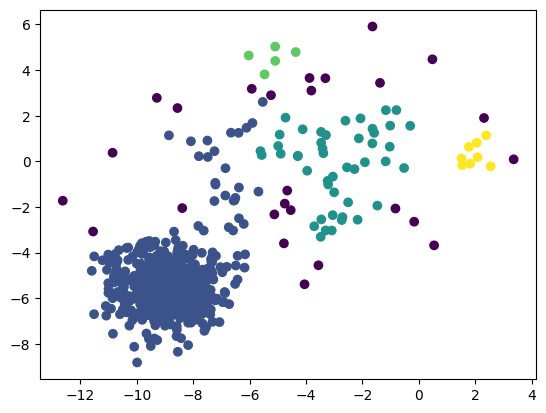

In [73]:
# 서로 다른 크기의 군집
from sklearn.cluster import DBSCAN
size_dbscan = DBSCAN(eps=1.0)
size_db_pred = size_dbscan.fit_predict(size_data)
plt.scatter(size_data[:, 0], size_data[:, 1], c=size_db_pred);

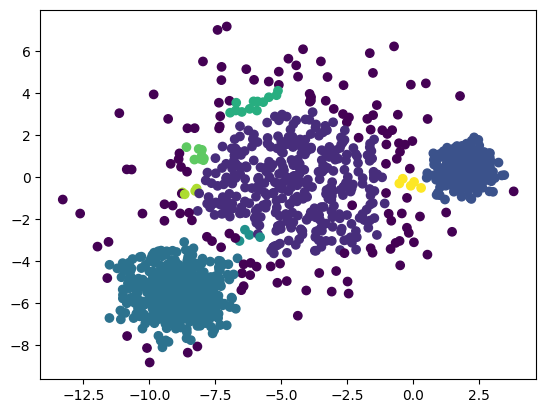

In [74]:
# 서로 다른 밀도의 군집
density_dbscan = DBSCAN()
density_db_pred = density_dbscan.fit_predict(density_data)
plt.scatter(density_data[:, 0], density_data[:, 1], c=density_db_pred);

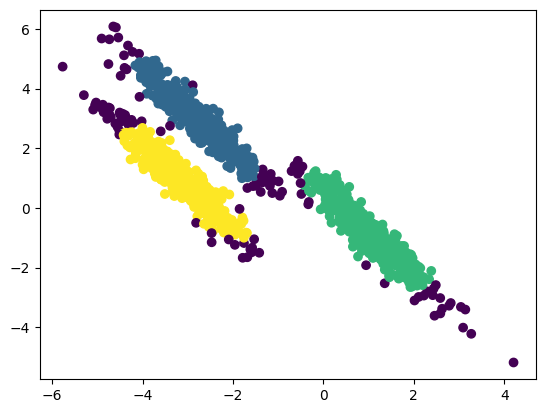

In [75]:
# 지역적 패턴이 있는 군집
pattern_db = DBSCAN(eps=.3, min_samples=20)
pattern_db_pred = pattern_db.fit_predict(pattern_data)
plt.scatter(pattern_data[:, 0], pattern_data[:, 1], c=pattern_db_pred);

# 3.Anomaly Detection

### 이상탐지의 정의

- 주어진 데이터의 정상 여부를 판별하는 문제
- 신용 카드 사기, 대출 사기 탐지 등이 대표적인 예

### 이상 탐지의 특징

- 이상 탐지 문제의 가장 큰 특징은 정상 데이터와 이상 데이터의 비율의 불균형

### 데이터 불균형의 정의

- 지도 학습에서 모델을 학습하기 위해서는 정답이 있는 데이터가 필요
- 예를 들어 Binary Classification 문제에서 한 쪽의 데이터가 매우 적은 상황

### 데이터 불균형의 문제

- 모델이 모든 예측 값을 데이터가 많은 쪽으로 예측하는 상황이 발생
- Decision Tree의 경우
    - 모든 데이터를 Majority Group으로 예측하면 더 많은 정보 이득을 얻을 수 있게 된다.

### 데이터 불균형의 해결 방법

1. 샘플링를 통한 해결 방법
    1. Under Sampling
        1. 정의 : Majority Grop의 데이터를 덜 뽑아서 데이터의 비율을 맞추는 방법
        2. A. Random Under Sampling : Majoirity Group의 데이터를 무작위로 삭제하는 방법
            1. 장점 : 빠르고 쉽다
            2. 단점 : Majority Group의 정보를 잃을 수 있다.
        3. B. Near Miss Under Sampling : Minority Group 근처에 있는 Majority Group의 데이터를 선택하는 방법
            1. 가장 가까운 3개의 Minority Group의 데이터의 평균 거리
            2. 가정 먼 3개의 Minority Group의 데이터의 평균 거리
            3. 가장 가까운 Minority Group의 데이터와의 거리
    2. Over Samplling
        1. 정의 : Minority Group의 데이터를 더 뽑아서 데이터의 비율을 맞추는 방법
        2. Simple Over Sampling : Minority Group에서 데이터를 더 많이 추출하는 방법
            1. 장점 : 빠르게 적용할 수 있다.
            2. 단점 : 데이터의 새로운 정보를 제공하지 않는다.
            3.           과대 적합 될 가능성이 크다.
        3. SMOTE(synthetic minority oversampling technique) : 합성 데이터를 생성해서 데이터의 비율을 맞추는 방법
            1. Minority Group에서 임의의 데이터를 선택한다.
            2. KNN으로 선택된 데이터와 Minority Group중 가까운 이웃을 찾는다.
            3. 선택된 데이터와 가까운 이웃 사이의 거리를 측정한다.
            4. 0~1 사이의 임의의 수를 곱하여 데이터를 생성한다.
            5. 데이터의 비율이 같아질 때 까지 1~4를 반복한다.
            6. 장점 : 정보가 손실되지 않는다.
            7. 단점 : 새로운 데이터를 잘 예측하지 못한다.
        
2. 모델을 통한 해결 방법

Out-of-Distribution의 정의

- 모델은 정상 범위의 데이터 (In-Distribution)만을 학습
- 정상 범위에서 먼 데이터(Out-of-Distrbution)을 이상으로 판단하는 이상 탐지 모델

Out-of-Distribution 종류

1. Isolation Forest
    1. Regression Decision Tree를 기반으로 한 Random Forest
    2. 정상 데이터는 더 많은 분할을 비정상 데이터는 분할을 덜 한다는 개념
2. OCSVM
    1. One-Class SVM
    2. 데이터를 Mapping 한 뒤 정상 데이터를 원점에서 멀어지게 하는 방법
    3. Feature Space에서 원점에서 가까운 데이터는 비정상 데이터
    4. Feature Space에서 원점에서 먼 데이터는 정상 데이터
    5. Feature Space에서 원점에서 가까운 데이터는 비정상 데이터
    6. Feature Space에서 원점에서 먼 데이터는 정상 데이터
3. PCA
    1. 차원 축소를 이용하는 방법
    2. 차원 축소 전  원래 데이터의 위치와 비교하여 거리가 먼 데이터를 비정상으로 판단
    3. 차원 축소 전 원래 데이터의 위치와 비교하여 거리가 먼 데이터를 비정상으로 판단

### Anomaly Detection과 Accuracy

- 정답을 Majority Group으로만 예측할 경우 Accuracy는 상승
- Minority Group을 잘 예측하는지 알 수 없다는 단점이 있다.

### F1-Score

- 정확도는 잘못 분류된 데이터를 반영하지 않은 문제가 있다.
- F1 Score는 Precision과 Recall의 조화 평균으로 계산된다.
- 잘못 분류된 데이터를 반영한 평가지표

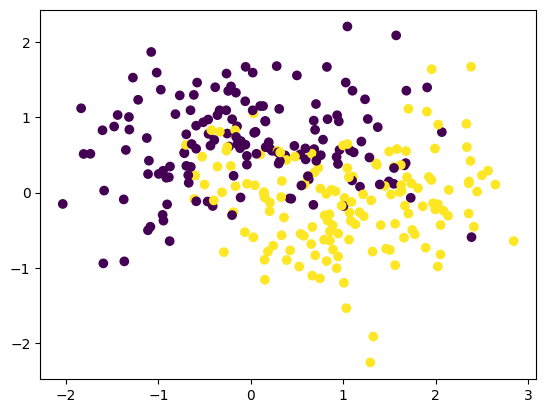

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

from sklearn.datasets import make_moons
data, label = make_moons(n_samples=300, shuffle=True, noise=0.5,random_state=2021)
plt.scatter(data[:,0], data[:,1], c=label);

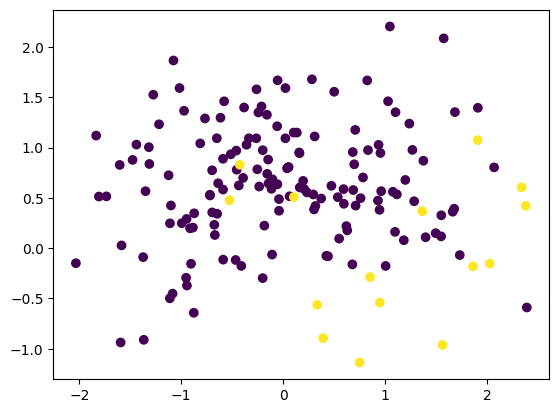

In [88]:
# Resample Data
from imblearn.datasets import make_imbalance
from collections import Counter

def ratio_func(y, multiplier, minority_class):
	target_stats = Counter(y)
	return {minority_class : int(multiplier * target_stats[minority_class])}

data, label = make_imbalance(
	data,
	label,
	sampling_strategy=ratio_func,
	**{"multiplier":0.1, "minority_class": 1,}
)

plt.scatter(data[:, 0], data[:, 1], c = label);

In [89]:
pd.Series(label).value_counts()

0    150
1     15
dtype: int64

train mean :  0 3
test mean :  0.1


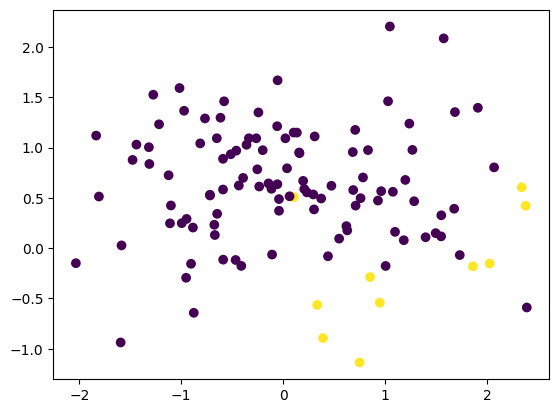

In [94]:
# Split Data
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(
	data, label, train_size=0.7, random_state=2021, stratify=label
)
print('train mean : ', round(train_label.mean()),3)
print('test mean : ',test_label.mean())
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_label);

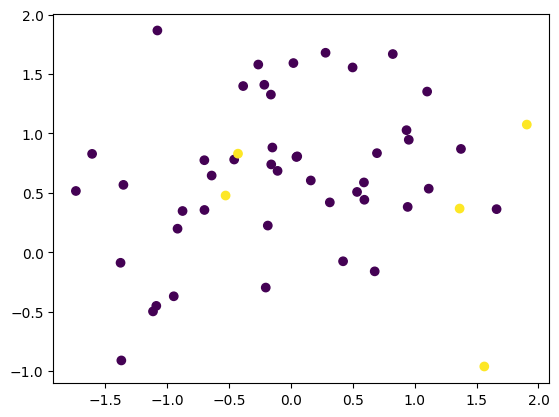

In [95]:
plt.scatter(test_data[:, 0], test_data[:, 1], c = test_label);

In [96]:
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 0].min() - 1, data[:, 0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), # # np.meshgrid : 격자 그리드 만들기
										 np.arange(y_min, y_max, 0.02))

In [97]:
# Model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

# 학습 & 예측
tree.fit(train_data, train_label)
tree_train_pred = tree.predict(train_data)
tree_test_pred = tree.predict(test_data)

In [98]:
# 평가
from sklearn.metrics import accuracy_score

tree_train_acc = accuracy_score(train_label, tree_train_pred)
tree_test_acc = accuracy_score(test_label, tree_test_pred)
print(f"Tree train accuray is {tree_train_acc:.4f}")
print(f"Tree test accuray is {tree_test_acc:.4f}")

Tree train accuray is 1.0000
Tree test accuray is 0.8800


In [99]:
# F1 Score
from sklearn.metrics import f1_score

tree_train_f1 = f1_score(train_label, tree_train_pred)
tree_test_f1 = f1_score(test_label, tree_test_pred)
print(f"Tree train F1-Score is {tree_train_f1:.4f}")
print(f"Tree test F1-Score is {tree_test_f1:.4f}")

Tree train F1-Score is 1.0000
Tree test F1-Score is 0.2500


In [102]:
# 시각화
tree_Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
tree_Z = tree_Z.reshape(xx.shape)

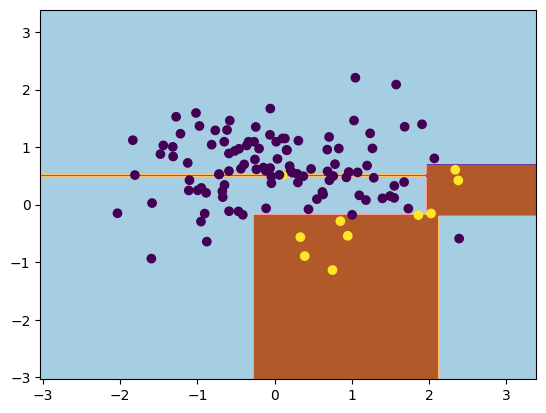

In [104]:
cs = plt.contourf(xx, yy, tree_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:, 0], train_data[:,1], c = train_label);

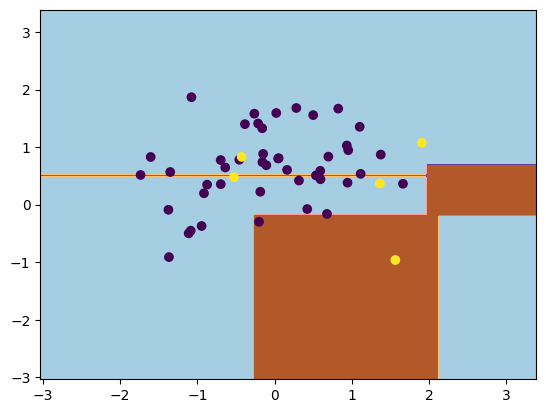

In [105]:
cs = plt.contourf(xx, yy, tree_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label);

## 3.1 Undersampling

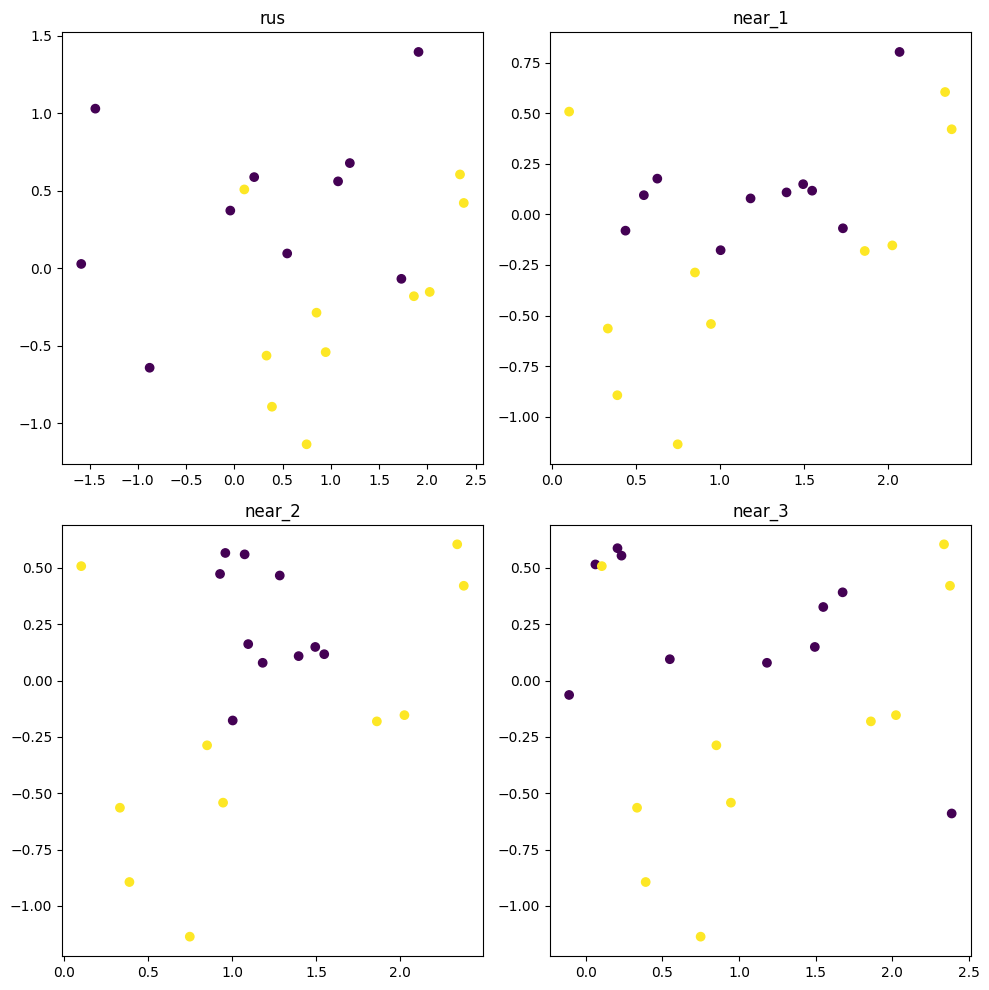

In [109]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
import matplotlib.pyplot as plt

# Assuming train_data and train_label are defined
under_dict = {}

rus = RandomUnderSampler(random_state=2021)
rus_data, rus_label = rus.fit_resample(train_data, train_label)
under_dict["rus"] = {"data": rus_data, "label": rus_label}

for i in range(1, 4):
    near_miss = NearMiss(version=i)
    near_data, near_label = near_miss.fit_resample(train_data, train_label)  # Unpack separately
    under_dict[f"near_{i}"] = {
        "data": near_data, "label": near_label
    }

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for idx, (name, sample) in enumerate(under_dict.items()):
    ax = axes[idx // 2, idx % 2]
    d, l = sample["data"], sample["label"]
    ax.scatter(d[:, 0], d[:, 1], c=l)
    ax.set_title(name)

plt.tight_layout()
plt.show()

In [113]:
from sklearn.tree import DecisionTreeClassifier

# Assuming under_dict and test_data are defined

# Training models
under_model = {}
for name, sample in under_dict.items():
    under_tree = DecisionTreeClassifier()
    under_tree.fit(sample["data"], sample["label"])
    under_model[name] = under_tree

# Making predictions
under_pred = {}
for name, under_tree in under_model.items():
    under_test_pred = under_tree.predict(test_data)
    under_pred[name] = under_test_pred

under_pred

{'rus': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 'near_1': array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1]),
 'near_2': array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 0, 1, 1]),
 'near_3': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1])}

In [117]:
# 평가 : 정확도
from sklearn.metrics import accuracy_score

for name, pred in under_pred.items():
		acc = accuracy_score(test_label, pred)
		print(f"{name} Sampling test accuracy is {acc:.4f}")

rus Sampling test accuracy is 0.8400
near_1 Sampling test accuracy is 0.1800
near_2 Sampling test accuracy is 0.3400
near_3 Sampling test accuracy is 0.8000


In [118]:
# 평가 : F1 Score
for name, pred in under_pred.items():
		f1 = f1_score(test_label, pred)
		print(f"{name} Sampling test F1-Score is {f1:.4f}")

rus Sampling test F1-Score is 0.2000
near_1 Sampling test F1-Score is 0.1633
near_2 Sampling test F1-Score is 0.1951
near_3 Sampling test F1-Score is 0.1667


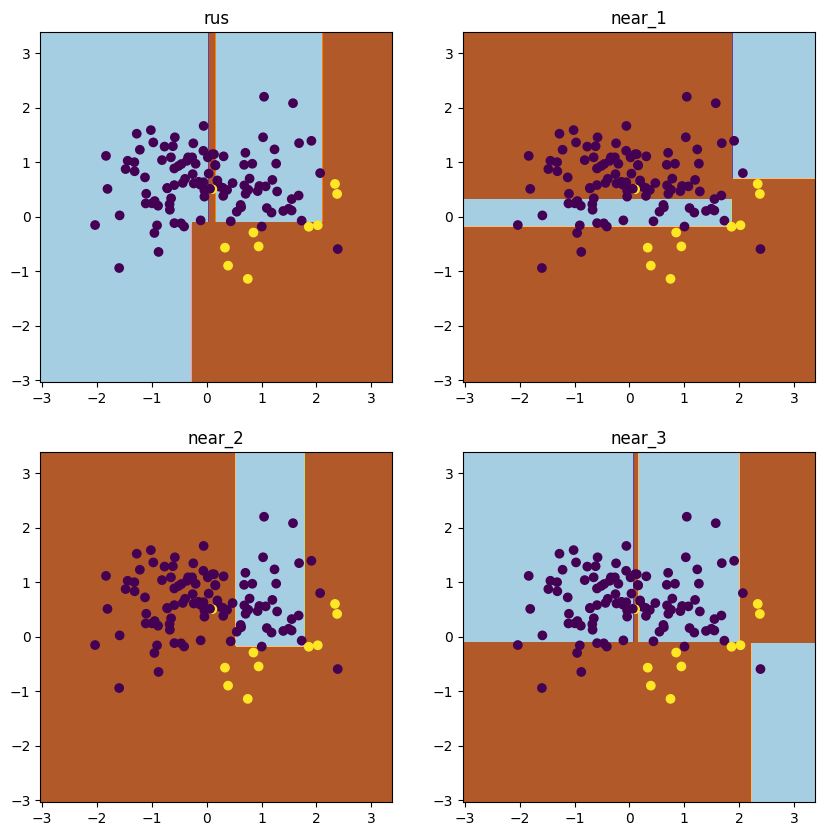

In [119]:
# 시각화
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for idx, (name, under_tree) in enumerate(under_model.items()):
    ax = axes[idx//2, idx%2]
    under_Z = under_tree.predict(np.c_[xx.ravel(), yy.ravel()])
    under_Z = under_Z.reshape(xx.shape)
    ax.contourf(xx, yy, under_Z, cmap=plt.cm.Paired)
    ax.scatter(train_data[:,0], train_data[:,1], c=train_label)
    ax.set_title(name)

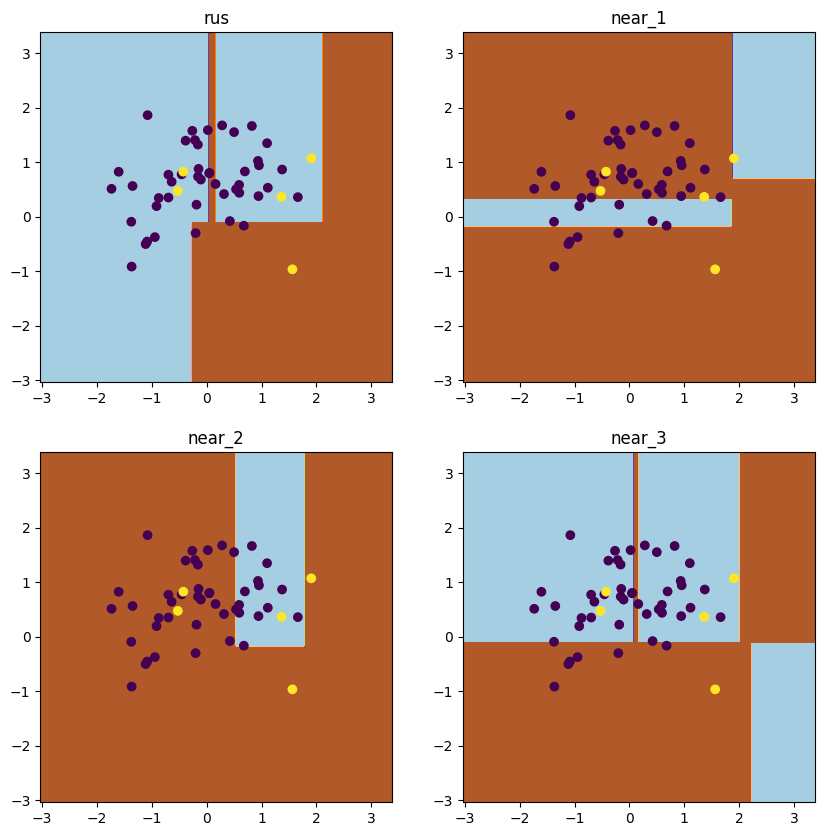

In [120]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for idx, (name, under_tree) in enumerate(under_model.items()):
    ax = axes[idx//2, idx%2]
    under_Z = under_tree.predict(np.c_[xx.ravel(), yy.ravel()])
    under_Z = under_Z.reshape(xx.shape)
    ax.contourf(xx, yy, under_Z, cmap=plt.cm.Paired)
    ax.scatter(test_data[:,0], test_data[:,1], c=test_label)
    ax.set_title(name)

## 3.2 Oversampling

In [121]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=2021)
smote_data, smote_label = smote.fit_resample(train_data, train_label)
smote_data[:10]

array([[ 1.0963906 ,  0.16215513],
       [ 0.43879078, -0.0803489 ],
       [ 0.20618849,  0.58791678],
       [-0.59047253,  0.58307246],
       [ 1.73131008, -0.06861231],
       [ 0.10237896,  1.1495802 ],
       [ 0.23230422,  0.55483897],
       [-1.1107737 ,  0.24678492],
       [ 0.94696029, -0.54173336],
       [-0.87710056, -0.64256821]])

In [122]:
smote_label[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Text(0.5, 1.0, 'smote data')

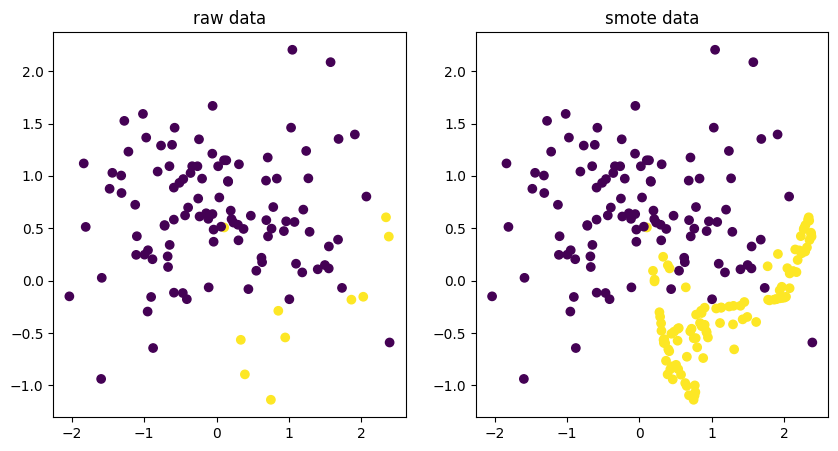

In [123]:
fig, axes = plt.subplots(nrows = 1, ncols=2, figsize = (10, 5))

axes[0].scatter(train_data[:, 0], train_data[:, 1], c=train_label)
axes[0].set_title("raw data")

axes[1].scatter(smote_data[:,0], smote_data[:,1], c=smote_label)
axes[1].set_title("smote data")

SMOTE test accuracy is 0.9000
SMOTE test F1-Score is 0.2857


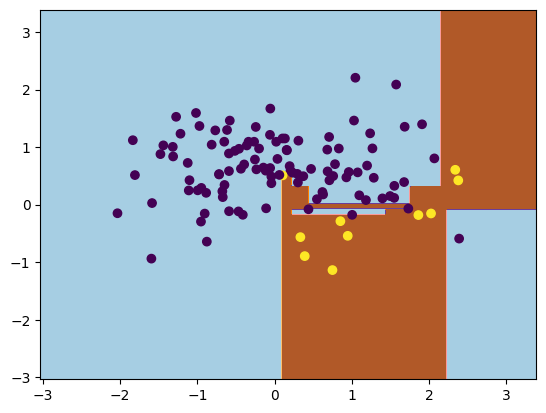

In [125]:
# 학습
smote_tree = DecisionTreeClassifier()
smote_tree.fit(smote_data, smote_label)

# 예측
smote_test_pred = smote_tree.predict(test_data)

# 정확도
smote_acc = accuracy_score(test_label, smote_test_pred)
print(f"SMOTE test accuracy is {smote_acc:.4f}")
# SMOTE testaccuracy is 0.9

# f1
smote_f1 = f1_score(test_label, smote_test_pred)
print(f"SMOTE test F1-Score is {smote_f1:.4f}")

# 시각화
smote_Z = smote_tree.predict(np.c_[xx.ravel(), yy.ravel()])
smote_Z = smote_Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, smote_Z, cmap = plt.cm.Paired)
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_label);

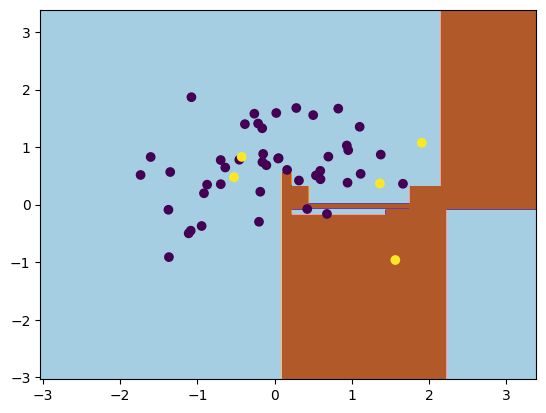

In [127]:
cs = plt.contourf(xx, yy, smote_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c =test_label);

In [128]:
# Result
print(f"Tree test accuray is {tree_test_acc:.4f}")
for name, pred in under_pred.items():
    acc = accuracy_score(test_label, pred)
    print(f"{name} Sampling test accuray is {acc:.4f}")
print(f"SMOTE test accuray is {smote_acc:.4f}")

Tree test accuray is 0.8800
rus Sampling test accuray is 0.8400
near_1 Sampling test accuray is 0.1800
near_2 Sampling test accuray is 0.3400
near_3 Sampling test accuray is 0.8000
SMOTE test accuray is 0.9000


In [129]:
print(f"Tree test F1-Score is {tree_test_f1:.4f}")
for name, pred in under_pred.items():
    f1 = f1_score(test_label, pred)
    print(f"{name} Sampling test F1-Score is {f1:.4f}")
print(f"SMOTE test F1-Score is {smote_f1:.4f}")

Tree test F1-Score is 0.2500
rus Sampling test F1-Score is 0.2000
near_1 Sampling test F1-Score is 0.1633
near_2 Sampling test F1-Score is 0.1951
near_3 Sampling test F1-Score is 0.1667
SMOTE test F1-Score is 0.2857


## 3.3 샘플 데이터와 Out-of-Distribution 모델

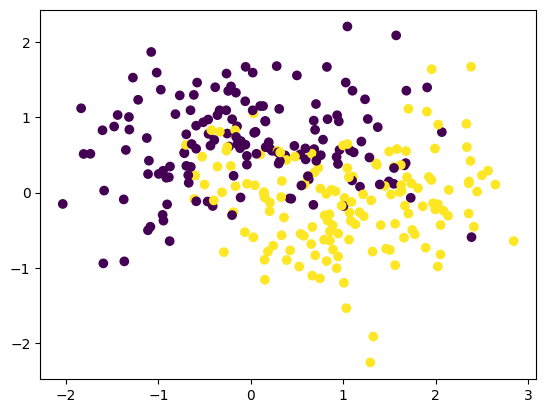

In [132]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample Data
from sklearn.datasets import make_moons
data, label = make_moons(n_samples=300, shuffle=True, noise=0.5, random_state=2021)
plt.scatter(data[:, 0], data[:, 1], c= label);

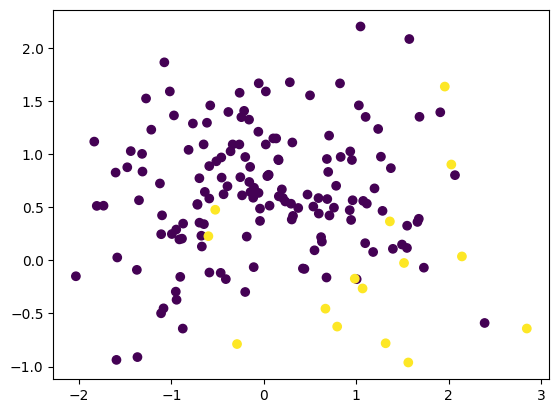

In [133]:
# Resample Data
from imblearn.datasets import make_imbalance
from collections import Counter

def ratio_func(y, multiplier, minority_class):
	target_stats = Counter(y)
	return {minority_class: int(multiplier * target_stats[minority_class])}

data, label = make_imbalance(
	data,
	label,
	sampling_strategy=ratio_func,
	**{"multiplier":0.1, "minority_class": 1,}
)

plt.scatter(data[:, 0], data[:, 1], c=label);

0.25

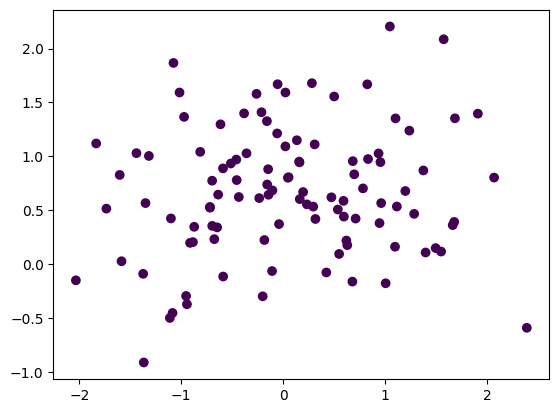

In [135]:
# Split Data
normal_data, abnormal_data = data[label==0], data[label==1]
normal_label, abnormal_label = label[label==0], label[label==1]

from sklearn.model_selection import train_test_split

train_data, test_normal_data, train_label, test_normal_label = train_test_split(
	normal_data, normal_label, train_size=0.7, random_state=2021
)
test_data = np.concatenate([test_normal_data, abnormal_data])
test_label = np.concatenate([test_normal_label, abnormal_label])
plt.scatter(train_data[:, 0], train_data[:, 1], c =train_label);

test_label.mean()

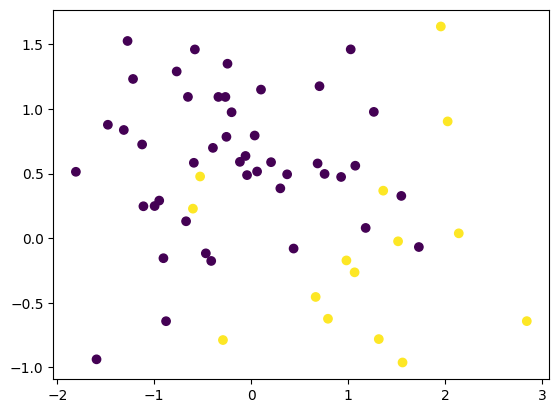

In [136]:
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label);

In [137]:
# 시각화
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [138]:
# Isolation Forest
from sklearn.ensemble import IsolationForest
isol_forest = IsolationForest()

# 학습 & 예측
isol_forest.fit(train_data, train_label)
isol_test_pred = isol_forest.predict(test_data)
isol_test_pred

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,
        1, -1, -1, -1, -1,  1, -1, -1, -1])

In [139]:
isol_forest.decision_function(test_data)

array([ 0.08270819,  0.03228556, -0.00296821,  0.03878402,  0.00964326,
        0.06014013,  0.08524101,  0.09924505,  0.09002472,  0.11062322,
        0.08773938,  0.02019053,  0.1007564 , -0.00141599,  0.10312202,
       -0.09608229,  0.1008525 , -0.06189449,  0.04975981,  0.0462971 ,
        0.02725998,  0.04625027,  0.01341782, -0.18835935,  0.03161207,
        0.00853597, -0.07546537,  0.05662146,  0.05531054,  0.07376738,
        0.09789454, -0.00119636,  0.06298656,  0.06839657,  0.00544362,
        0.07227181,  0.00667703, -0.0371019 ,  0.03324345,  0.06380423,
        0.09461946,  0.08390235,  0.03005273,  0.08317607,  0.00492584,
       -0.14761247,  0.03097308, -0.16645837, -0.08179672, -0.13493416,
       -0.12597274,  0.0486925 , -0.12296048, -0.11294923, -0.23794381,
       -0.02937235,  0.07506128, -0.07514661, -0.04069447, -0.05572758])

In [141]:
# 정확도 평가
isol_test_acc = accuracy_score(test_label, isol_test_pred == -1)
print(f"Isolation Forest Test Accurcay is {isol_test_acc:.4f}")

Isolation Forest Test Accurcay is 0.8167


In [142]:
# f1 score
isol_test_f1 = f1_score(test_label, isol_test_pred == -1)
print(f"Isolation Forest Test F1-Score is {isol_test_f1:.4f}")

Isolation Forest Test F1-Score is 0.6857


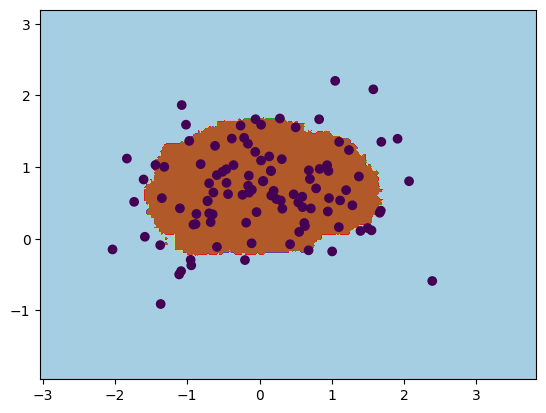

In [144]:
# 시각화
isol_Z = isol_forest.predict(np.c_[xx.ravel(), yy.ravel()])
isol_Z = isol_Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, isol_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_label);

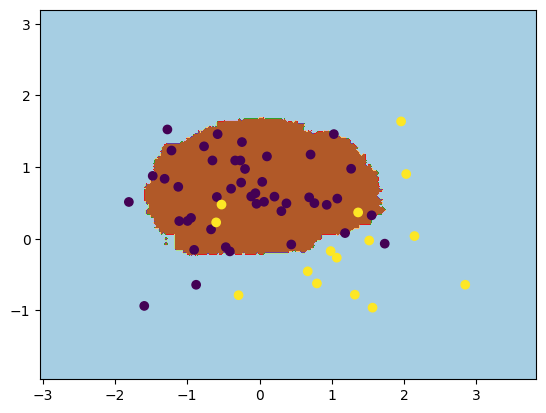

In [145]:
cs = plt.contourf(xx, yy, isol_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label);

## 3.4 OCSVM

In [146]:
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM()
ocsvm.fit(train_data, train_label)
ocsvm_test_pred = ocsvm.predict(test_data)
ocsvm_test_pred

array([ 1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1,  1, -1, -1, -1])

In [147]:
# 정확도 평가
ocsvm_test_acc = accuracy_score(test_label, ocsvm_test_pred == -1)
print(f"OCSVM Test Accuracy is {ocsvm_test_acc:.4f}")

OCSVM Test Accuracy is 0.5833


In [148]:
# f1 score
ocsvm_test_f1 = f1_score(test_label, ocsvm_test_pred == -1)
print(f"OCSVM Test F1-Score is {ocsvm_test_f1:.4f}")

OCSVM Test F1-Score is 0.5098


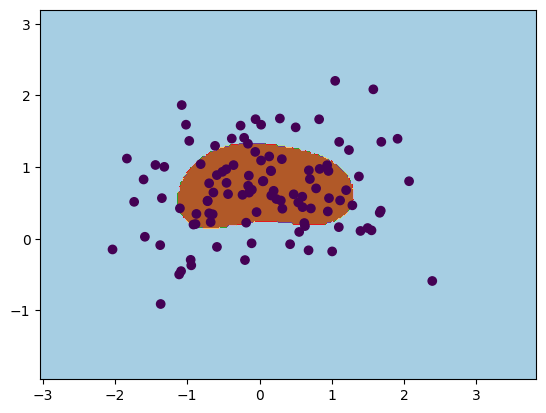

In [150]:
# 시각화
ocsvm_Z = ocsvm.predict(np.c_[xx.ravel(), yy.ravel()])
ocsvm_Z = ocsvm_Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, ocsvm_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label);

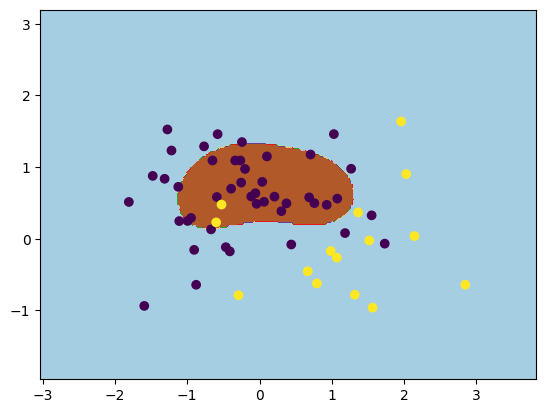

In [151]:
cs = plt.contourf(xx, yy, ocsvm_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label);

## 3.5 PCA

In [153]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(train_data)
test_latent = pca.transform(test_data)
test_latent[:10]

array([[ 2.96603448e-01],
       [ 1.24231267e+00],
       [ 1.06281107e+00],
       [-7.40403889e-01],
       [-1.04768362e+00],
       [ 1.06747491e-01],
       [ 2.14169771e-01],
       [-2.90818242e-01],
       [-6.48459113e-01],
       [-2.02332106e-04]])

In [154]:
test_recon = pca.inverse_transform(test_latent)
recon_diff = (test_data - test_recon) ** 2
print(test_data[0])
print(test_recon[0])
print(recon_diff[0])

[0.37198025 0.49392302]
[0.34662995 0.7059456 ]
[0.00064264 0.04495357]


In [155]:
pca_pred = recon_diff.mean(1)
pca_pred[:10]

array([2.27981061e-02, 1.27982521e-02, 2.23592395e-01, 2.53514995e-01,
       2.49587527e-01, 1.10212458e-01, 4.89886192e-02, 1.10896685e-02,
       5.78102995e-05, 7.73374114e-03])

PCA test AUROC is 0.7822


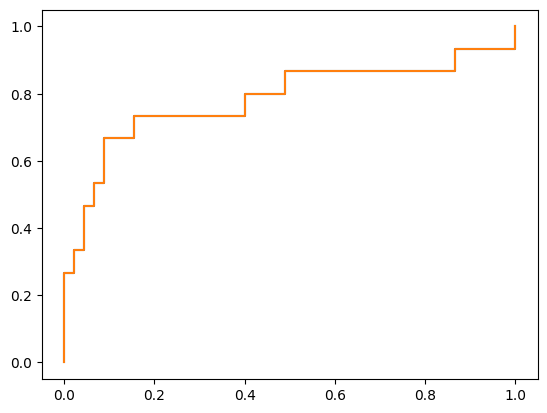

In [156]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(test_label, pca_pred)
pca_auroc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.plot(fpr, tpr)
print(f"PCA test AUROC is {pca_auroc:.4f}")

In [157]:
f1_scores = []
for t in threshold:
    pca_test_pred = pca_pred > t
    pca_test_f1 = f1_score(test_label, pca_test_pred)
    f1_scores += [pca_test_f1]
    print(f"threshold: {t:.4f}, f1-score: {pca_test_f1:.4f}")

threshold: 2.6210, f1-score: 0.0000
threshold: 1.6210, f1-score: 0.0000
threshold: 0.9913, f1-score: 0.3333
threshold: 0.9820, f1-score: 0.4211
threshold: 0.9430, f1-score: 0.4000
threshold: 0.7125, f1-score: 0.4762
threshold: 0.5504, f1-score: 0.5217
threshold: 0.5065, f1-score: 0.5833
threshold: 0.4491, f1-score: 0.5600
threshold: 0.4357, f1-score: 0.6154
threshold: 0.3733, f1-score: 0.6429
threshold: 0.3090, f1-score: 0.6452
threshold: 0.2695, f1-score: 0.6250
threshold: 0.1082, f1-score: 0.5116
threshold: 0.1044, f1-score: 0.5000
threshold: 0.0748, f1-score: 0.5000
threshold: 0.0655, f1-score: 0.4898
threshold: 0.0077, f1-score: 0.3939
threshold: 0.0076, f1-score: 0.3881
threshold: 0.0001, f1-score: 0.3836
threshold: 0.0000, f1-score: 0.3784


In [158]:
best_thresh = threshold[np.argmax(f1_scores)]
best_thresh

0.30898713360118335

In [159]:
pca_test_pred = pca_pred > best_thresh
pca_test_pred

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True, False,  True,  True, False, False,  True,
        True,  True, False,  True,  True,  True])

In [160]:
pca_test_acc = accuracy_score(test_label, pca_test_pred)
print(f"PCA Test Accuracy is {pca_test_acc:.4f}")

PCA Test Accuracy is 0.8167


In [161]:
# f1 score
pca_test_f1 = f1_score(test_label, pca_test_pred)
print(f"PCA Test F1-Score is {pca_test_f1:.4f}")

PCA Test F1-Score is 0.6452


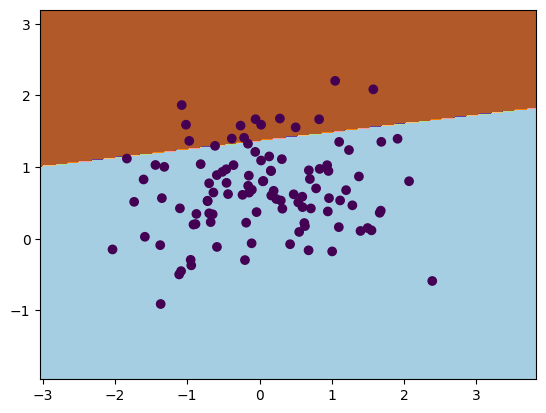

In [163]:
# 시각화
Z = np.c_[xx.ravel(), yy.ravel()]
Z_latent = pca.transform(Z)
Z_recon = pca.inverse_transform(Z_latent)
pca_Z = (Z - Z_recon).mean(1)

pca_Z = list(map(int, pca_Z > best_thresh))
pca_Z = np.array(pca_Z).reshape(xx.shape)
cs = plt.contourf(xx, yy, pca_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label);

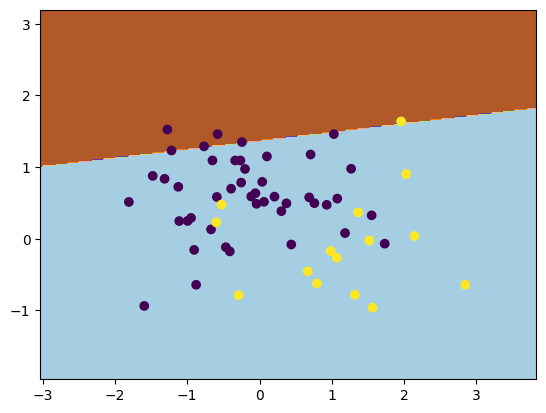

In [164]:
cs = plt.contourf(xx, yy, pca_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label);

In [167]:
# Result
print(f"Isolation Forest Test Accuracy is {isol_test_acc:.4f}")
print(f"OCSVM Test Accuracy is {ocsvm_test_acc:.4f}")
print(f"PCA Test Accuracy is {pca_test_acc:.4f}")
print('')
print(f"Isolation Forest Test F1-Score is {isol_test_f1:.4f}")
print(f"OCSVM Test F1-Score is {ocsvm_test_f1:.4f}")
print(f"PCA Test F1-Score is {pca_test_f1:.4f}")

Isolation Forest Test Accuracy is 0.8167
OCSVM Test Accuracy is 0.5833
PCA Test Accuracy is 0.8167

Isolation Forest Test F1-Score is 0.6857
OCSVM Test F1-Score is 0.5098
PCA Test F1-Score is 0.6452
